In [6]:
import pandas as pd

file = "/Users/yoon/Downloads/data.csv"
df = pd.read_csv(file)
feature_list = df.columns.tolist()
print(feature_list)

['No.', '방송일자', '월', '일', '요일', '방송시간', '시간', '시간1', '분', 'PGM ID', 'PGM 수_\n중복여부', 'PGM\n인덱스', '주말여부', '시간대', '유형여부', 'B PGM 여부', ' MBS_UV\n평균 ', 'PGM', 'MD팀', '상품군', '아이템', '아이템명', '편성분', '가중분', '가분취', ' 예상취급액 ', '취급액_달성율', ' 취급액\n40% 미만 ', ' 취급액\n60% 미만 ', ' 미리주문 ', 'MD명', '협력사', '협력사명', '상품코드', '상품명', ' 가격 ', '무이자', ' ARS할인 ', ' 일시불할인 ', '기본구성', '추가구성', '아이템_공유', '협력사_공유', '신상여부', '년간중복', '월 \n중복편성', '월 중복편성(누적)', '월\n협력사', '월 \n협력사수\n(누적)', ' 총주문금액 ', ' 총주문건수 ', ' 총주문고객수 ', '전환율', ' 1_단골 ', ' 2_일반 ', ' 3_최초신규 ', ' 4_Wake-up ', 'CALL', 'MCPC']


In [7]:
df.isnull().sum()

No.                  0
방송일자                 0
월                    0
일                    0
요일                   0
방송시간                 0
시간                   0
시간1                  0
분                    0
PGM ID               0
PGM 수_\n중복여부         0
PGM\n인덱스             0
주말여부                 0
시간대                  0
유형여부                 0
B PGM 여부             0
 MBS_UV\n평균          0
PGM                  0
MD팀                  0
상품군                  0
아이템                  0
아이템명                 0
편성분                  0
가중분                  0
가분취                  0
 예상취급액               0
취급액_달성율              0
 취급액\n40% 미만         0
 취급액\n60% 미만         0
 미리주문                0
MD명                190
협력사                  0
협력사명                 0
상품코드                 0
상품명                  0
 가격                  0
무이자                  0
 ARS할인               0
 일시불할인               0
기본구성                 0
추가구성              6364
아이템_공유               0
협력사_공유               0
신상여부       

In [8]:
selected = ["요일", "방송시간", "주말여부", "시간대", "유형여부", "B PGM 여부", " MBS_UV\n평균 ",
"PGM", "상품군", "가중분", " 가격 ", " 총주문금액 ", "전환율", " 미리주문 "]

df_selected = df[selected]
df_selected.shape
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 14 columns):
요일             9141 non-null object
방송시간           9141 non-null int64
주말여부           9141 non-null object
시간대            9141 non-null object
유형여부           9141 non-null object
B PGM 여부       9141 non-null object
 MBS_UV
평균     9141 non-null object
PGM            9141 non-null object
상품군            9141 non-null object
가중분            9141 non-null int64
 가격            9141 non-null object
 총주문금액         9141 non-null object
전환율            9141 non-null object
 미리주문          9141 non-null object
dtypes: int64(2), object(12)
memory usage: 999.9+ KB


In [9]:
df_selected[' MBS_UV\n평균 '] = df_selected[' MBS_UV\n평균 '].apply( lambda x: x.replace(',', '') )
df_selected[' MBS_UV\n평균 '] = df_selected[' MBS_UV\n평균 '].apply( lambda x: x.replace(' - ', '0') )
df_selected[' 가격 '] = df_selected[' 가격 '].apply( lambda x: x.replace(',', '') )
df_selected[' 가격 '] = df_selected[' 가격 '].apply( lambda x: x.replace(' - ', '0') )
df_selected[' 총주문금액 '] = df_selected[' 총주문금액 '].apply( lambda x: x.replace(',', '') )
df_selected[' 총주문금액 '] = df_selected[' 총주문금액 '].apply( lambda x: x.replace(' - ', '0') )
df_selected['전환율'] = df_selected['전환율'].apply( lambda x: x.replace('%', '') )
df_selected['전환율'] = df_selected['전환율'].apply( lambda x: x.replace(' - ', '0') )
df_selected['전환율'] = df_selected['전환율'].apply( lambda x: x.replace('#DIV/0!', '0') )
df_selected[' 미리주문 '] = df_selected[' 미리주문 '].apply( lambda x: x.replace(',', '') )
df_selected[' 미리주문 '] = df_selected[' 미리주문 '].apply( lambda x: x.replace(' - ', '0') )

reshape_list = [' MBS_UV\n평균 ', ' 가격 ', ' 총주문금액 ', '전환율', ' 미리주문 ']

df_selected.isnull().sum()

df_selected[reshape_list] = df_selected[reshape_list].apply(pd.to_numeric)

df_selected.head(20)

/anaconda/envs/gsshop/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/envs/gsshop/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/envs/gsshop/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,요일,방송시간,주말여부,시간대,유형여부,B PGM 여부,MBS_UV 평균,PGM,상품군,가중분,가격,총주문금액,전환율,미리주문
0,일,100,주말,심야,무형,일반,5356,여행.,여행,29,1390000,3680983142,4,0
1,일,200,주말,심야,무형,일반,5356,여행.,여행,10,699000,1006695965,3,0
2,일,600,주말,새벽,유형,일반,2331,속옷.,속옷,16,129000,56858240,51,9000000
3,일,645,주말,새벽,유형,일반,2476,생활가전.,생활가전,61,198000,171929043,61,5000000
4,일,750,주말,오전P,유형,일반,2639,생활용품.,생활용품,79,79900,285530361,82,40000000
5,일,850,주말,오전P,유형,일반,3458,일반가전.,일반가전,98,2010000,948441039,39,4000000
6,일,1000,주말,오전P,유형,일반,3466,이미용.,이미용,107,84000,606189656,79,15000000
7,일,1115,주말,일반,유형,일반,4107,생활용품.,생활용품,109,399000,607371654,61,7000000
8,일,1230,주말,일반,유형,일반,3259,건강식품.,건강식품,91,158000,318156082,78,0
9,일,1345,주말,일반,유형,일반,3292,헤어/미용기구,헤어/미용기구,79,79900,436473485,84,38000000


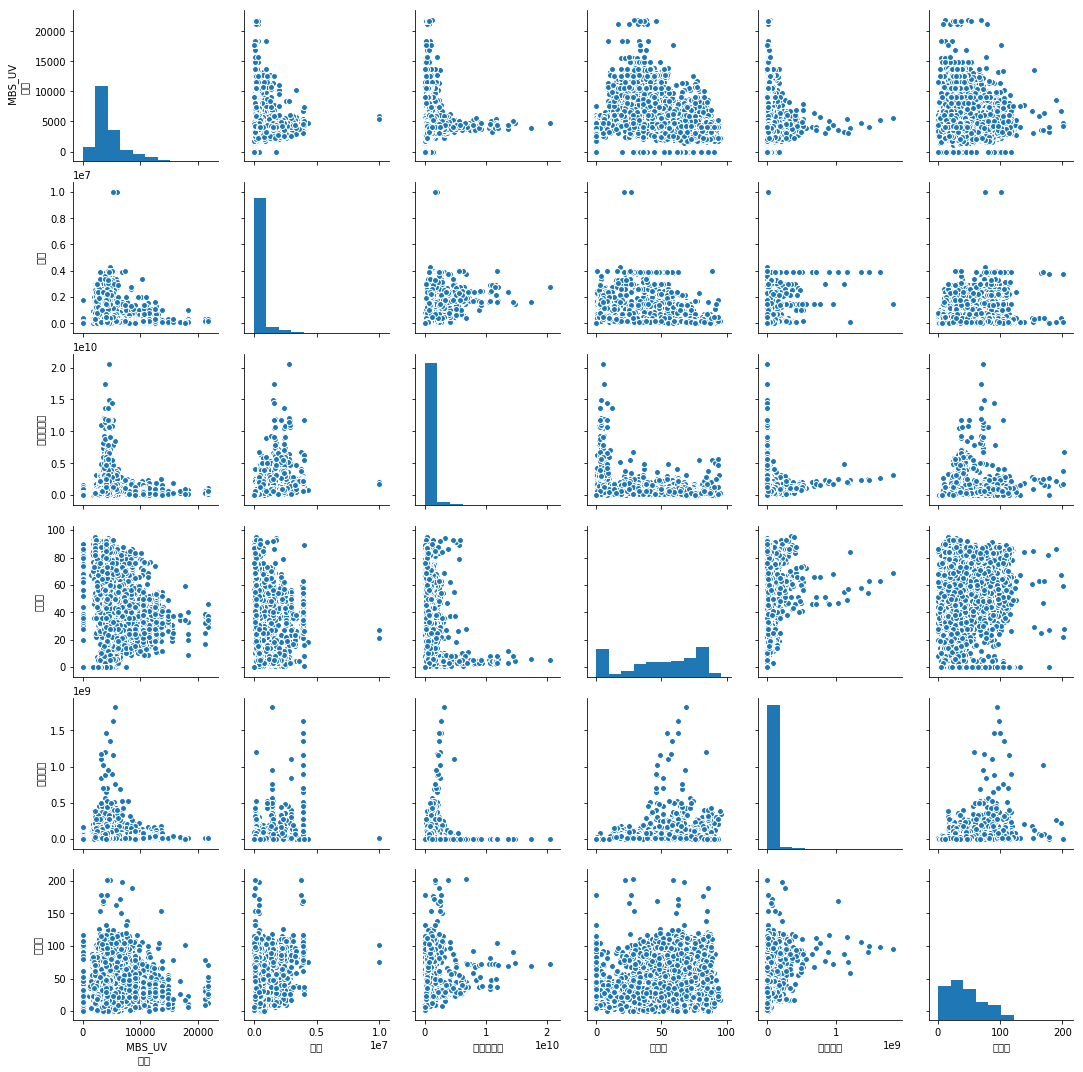

In [11]:
%matplotlib inline
import seaborn as sns

numeric_list = [' MBS_UV\n평균 ', ' 가격 ', ' 총주문금액 ', '전환율', ' 미리주문 ', '가중분']
sns.pairplot(df_selected[numeric_list])

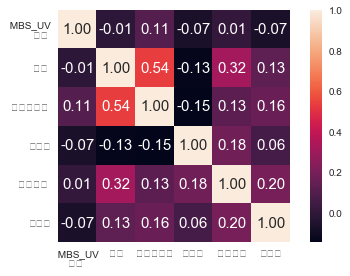

In [17]:
import matplotlib as mpl
mpl.rc('font', family='08SeoulHangang') # 각자 OS에 존재하는 한글폰트를 선택하면 됨. 없는경우 위의 링크에서 나눔폰트 다운로드 후 실행
mpl.rc('axes', unicode_minus=False)

import numpy as np
import matplotlib.pyplot as plt

cm = np.corrcoef(df_selected[numeric_list].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=numeric_list,
            xticklabels=numeric_list)

plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# training
df[' 예상취급액 '] = df[' 예상취급액 '].apply( lambda x: x.replace(',', '') )
df[' 예상취급액 '] = df[' 예상취급액 '].apply(pd.to_numeric)
y = df[' 예상취급액 ']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

df_selected_dummies = pd.get_dummies(df_selected)
X_train, X_test, y_train, y_test = train_test_split(df_selected_dummies, y, test_size=0.3, random_state=0)

In [22]:
# regression
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', # mse
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [23]:
# 학습평가
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 5981478289.367, test: 34481114068.332
R^2 train: 0.965, test: 0.848


In [24]:
# 변수중요소 산출
importances = forest.feature_importances_

feat_labels = X_train.columns.values
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) 가중분                            0.417588
 2)  MBS_UV
평균                     0.197627
 3)  가격                            0.094924
 4) 상품군_렌탈                         0.090186
 5) PGM_렌탈.                        0.066766
 6)  총주문금액                         0.047352
 7) 방송시간                           0.029140
 8) 전환율                            0.013957
 9) 요일_일                           0.009204
10) 주말여부_평일                        0.006595
11) 주말여부_주말                        0.006404
12) 상품군_가구                         0.003128
13) 요일_수                           0.003105
14)  미리주문                          0.002623
15) 요일_월                           0.001471
16) 시간대_오후P                        0.001322
17) 시간대_오전P                        0.001037
18) 요일_화                           0.000936
19) 상품군_건강식품                       0.000768
20) PGM_시공가구.                      0.000738
21) 요일_목                           0.000475
22) 요일_토                           0.000427
23) PGM_이미용.                    

In [26]:
# 교차검증
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, X_train, y_train, cv=10)
print(scores)

[0.74462828 0.48713473 0.76021187 0.77627322 0.72228092 0.94028366
 0.87816838 0.86589549 0.72886779 0.66753539]
